In [1]:
import os, sys
os.environ['PYTHONHASHSEED']=str(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.set_random_seed(0)

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import itertools
import time
import itertools
from IPython.display import display, clear_output
import glob
import tqdm
import h5py

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.initializers import glorot_uniform
from keras import optimizers

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
VERSION = '03'

try:
    import google.colab
    from google.colab import drive

    drive.mount('/content/gdrive', force_remount=True)
    root_path = 'gdrive/My Drive/Colab Notebooks/PNXS/'
    print('Working on google colab')
except:
    root_path = '../'
    print('Working locally')

directory= f'{root_path}models/{VERSION}'
if not os.path.exists(directory):
    os.makedirs(directory)    
    
# sys.path.append(f'{root_path}/rsc/{VERSION}')

# from load_data import load_data
# from pre_process_data import pre_process_data
# from create_model import create_model, print_version
# from helper import play_bell, LossHistory, add_grid_and_save
# from train_model import train_model
# from run_training import run_training
# from parameter_space import Parameter_space


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Working on google colab


In [97]:
# xray_path = f'{root_path}data/train/*'
# mask_path = f'{root_path}data/masks/*'
# xray_files = sorted(glob.glob(xray_path))[:-19]
# mask_files = sorted(glob.glob(mask_path))[:-19]


# import random
# random.seed(2)

# c = list(zip(xray_files, mask_files))
# random.shuffle(c)
# xray_files, mask_files = zip(*c)

# batch_size = 32

# train_len = 250 * batch_size
# dev_len = 40 * batch_size
# test_len = 40 * batch_size

# X_train_files = xray_files[:train_len]
# y_train_files = mask_files[:train_len]

# X_dev_files = xray_files[train_len:train_len+dev_len]
# y_dev_files = mask_files[train_len:train_len+dev_len]

# X_test_files = xray_files[train_len+dev_len:train_len+dev_len+test_len]
# y_test_files = mask_files[train_len+dev_len:train_len+dev_len+test_len]

# print(f'Train:{len(X_train_files)}, dev:{len(X_dev_files)}, test:{len(X_test_files)}')

ValueError: ignored

In [0]:
# with_mask = []
# for i, f in enumerate(y_train_files):
#     m = np.sum(img_to_array(load_img(f, color_mode='grayscale')))
#     with_mask.append(m>1)
# train_positive = np.mean(with_mask)

# with_mask = []
# for i, f in enumerate(y_dev_files):
#     m = np.sum(img_to_array(load_img(f, color_mode='grayscale')))
#     with_mask.append(m>1)
# dev_positive = np.mean(with_mask)

# with_mask = []
# for i, f in enumerate(y_test_files):
#     m = np.sum(img_to_array(load_img(f, color_mode='grayscale')))
#     with_mask.append(m>1)
# test_positive = np.mean(with_mask)

# print('Images with mask:')
# print(f'Train:{train_positive}, dev:{dev_positive}, test:{test_positive}')

In [0]:
# import h5py
# data_filename = f'{root_path}data/data.h5'
# with h5py.File(data_filename, "w") as out:
    
#     data_type = 'uint8'
    
#     out.create_dataset("X_train",(len(X_train_files),256,256,1),dtype=data_type)
#     out.create_dataset("Y_train",(len(X_train_files),256,256,1),dtype=data_type)      
#     out.create_dataset("X_dev",(len(X_dev_files),256,256,1),dtype=data_type)
#     out.create_dataset("Y_dev",(len(X_dev_files),256,256,1),dtype=data_type)      
#     out.create_dataset("X_test",(len(X_test_files),256,256,1),dtype=data_type)
#     out.create_dataset("Y_test",(len(X_test_files),256,256,1),dtype=data_type)
    
#     for index in range(len(y_train_files)):
#         out['X_train'][index, :, :, :] = img_to_array(load_img(X_train_files[index], color_mode='grayscale')).astype(data_type)
#         out['Y_train'][index, :, :, :] = img_to_array(load_img(y_train_files[index], color_mode='grayscale')).astype(data_type)
        
#     for index in range(len(y_dev_files)):
#         out['X_dev'][index, :, :, :] = img_to_array(load_img(X_dev_files[index], color_mode='grayscale')).astype(data_type)
#         out['Y_dev'][index, :, :, :] = img_to_array(load_img(y_dev_files[index], color_mode='grayscale')).astype(data_type)
        
#     for index in range(len(y_test_files)):
#         out['X_test'][index, :, :, :] = img_to_array(load_img(X_test_files[index], color_mode='grayscale')).astype(data_type)
#         out['Y_test'][index, :, :, :] = img_to_array(load_img(y_test_files[index], color_mode='grayscale')).astype(data_type)


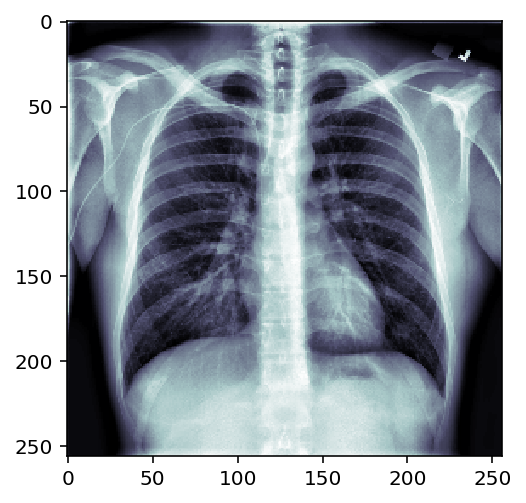

In [5]:
data_filename = f'{root_path}data/data.h5'
with h5py.File(data_filename, 'r') as f:
    a = f['X_train'][()]
    
plt.imshow(a[7,:,:,0]/255, cmap='bone')

In [6]:
 image_randomiser = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    fill_mode='nearest',
    brightness_range = (-0.1, 0.1),
    horizontal_flip=True)
transformation = image_randomiser.get_random_transform(img_shape=(256,256,1))

transformed = image_randomiser.apply_transform((a[7,:,:,0]/255).reshape(256,256,1), transformation)
transformed.shape

(256, 256, 1)

In [0]:
def create_data_generator(X, y, batch_size):    
    number_of_samples = X.shape[0]
    print(f'Creating generator from {number_of_samples} samples')
    
    index = 0
    while True:
        data_X = np.zeros([batch_size, 256, 256, 1])
        data_y = np.zeros([batch_size, 256, 256, 1])
        
        for i in range(batch_size):
            data_X[i, ...] = X[index % number_of_samples,...]/255.
            data_y[i, ...] = y[index % number_of_samples,...]/255.
            index = index + 1
            
        data_X = data_X * np.ones([batch_size, 256, 256, 3])
        yield data_X, data_y
        
        
def create_data_random_generator(X, y, batch_size):
    
    image_randomiser = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.02,
        height_shift_range=0.02,
        zoom_range=0.02,
        fill_mode='nearest',
        horizontal_flip=True)
    
    
    number_of_samples = X.shape[0]
    print(f'Creating generator from {number_of_samples} samples')
    
    index = 0
    while True:
        data_X = np.zeros([batch_size, 256, 256, 1])
        data_y = np.zeros([batch_size, 256, 256, 1])
        
        transformation = image_randomiser.get_random_transform(img_shape=(256,256,1))
        
        for i in range(batch_size):
            data_X[i, ...] = image_randomiser.apply_transform(
                        X[index % number_of_samples,...]/255., transformation)
            
            data_y[i, ...] = image_randomiser.apply_transform(
                        y[index % number_of_samples,...]/255., transformation)
            index = index + 1
            
        data_X = data_X * np.ones([batch_size, 256, 256, 3])
        yield data_X, data_y

In [0]:
with h5py.File(data_filename, 'r') as f:
    train_generator = create_data_random_generator(f['X_train'][()], f['Y_train'][()], 32)
    
with h5py.File(data_filename, 'r') as f:
    dev_generator = create_data_generator(f['X_dev'][()], f['Y_dev'][()], 32)

In [0]:
with h5py.File(data_filename, 'r') as f:
    test_generator = create_data_generator(f['X_test'][()], f['Y_test'][()], 32)

In [0]:
# for a in range(2):
#     i, o = next(train_generator)
#     plt.imshow(i[0][:,:,2].reshape(256, 256), cmap='bone')
#     plt.imshow(o[0][:,:,0].reshape(256, 256), alpha=0.5)
#     plt.show()

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (256, 256, 3))

conv_base.trainable=False

In [0]:
# conv_base.layers[-5].name

In [33]:
layer_name = 'block4_pool'
conv_base_crop= Model(inputs=conv_base.layers[0].input, outputs=conv_base.layers[-5].output)
conv_base_crop.trainable=False
conv_base_crop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [73]:
from keras import models


doctor_model = models.Sequential()
# doctor_model.add(conv_base)
doctor_model.add(conv_base_crop)

# doctor_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# doctor_model.add(UpSampling2D((2,2)))
doctor_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
doctor_model.add(UpSampling2D((2,2)))
doctor_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
doctor_model.add(UpSampling2D((2,2)))
doctor_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
doctor_model.add(UpSampling2D((2,2)))
doctor_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
doctor_model.add(UpSampling2D((2,2)))
doctor_model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
def customLoss(yTrue,yPred):
    return K.sum(K.log(yTrue) - K.log(yPred))

doctor_model.trainable=True
doctor_model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.Adam(lr=2e-5))
outs = []

In [65]:
out = doctor_model.fit_generator(train_generator,
                                 steps_per_epoch = 250,
                                 epochs=30,
                                 validation_data = dev_generator,
                                 validation_steps = 40,
                                 verbose=1)

outs.append(out)

Epoch 1/30
250/250 [==============================] - 142s 566ms/step - loss: 0.0116 - val_loss: 0.0121
Epoch 2/30
250/250 [==============================] - 137s 548ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 3/30
250/250 [==============================] - 136s 546ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 4/30
250/250 [==============================] - 138s 551ms/step - loss: 0.0114 - val_loss: 0.0121
Epoch 5/30
250/250 [==============================] - 138s 553ms/step - loss: 0.0114 - val_loss: 0.0120
Epoch 6/30
250/250 [==============================] - 138s 553ms/step - loss: 0.0114 - val_loss: 0.0121
Epoch 7/30
250/250 [==============================] - 138s 552ms/step - loss: 0.0114 - val_loss: 0.0120
Epoch 8/30
250/250 [==============================] - 138s 553ms/step - loss: 0.0113 - val_loss: 0.0121
Epoch 9/30
250/250 [==============================] - 139s 554ms/step - loss: 0.0112 - val_loss: 0.0119
Epoch 10/30
250/250 [==============================] - 138s 554m

In [0]:
# doctor_model.save(f'{root_path}/model_03_110epochs.h5')
# model_doc.save(f'{root_path}/model_03_100epochs.h5')
# model_doc = load_model(f'{root_path}/model_03_90epochs.h5')

# model_doc = load_model(f'{root_path}/model_03_90epochs.h5')

In [123]:
out = model_doc.fit_generator(train_generator,
                                 steps_per_epoch = 250,
                                 epochs=10,
                                 validation_data = dev_generator,
                                 validation_steps = 40,
                                 verbose=1)

outs.append(out)




Epoch 1/10
250/250 [==============================] - 296s 1s/step - loss: 0.0117 - val_loss: 0.0115
Epoch 2/10
250/250 [==============================] - 293s 1s/step - loss: 0.0108 - val_loss: 0.0109
Epoch 3/10
250/250 [==============================] - 293s 1s/step - loss: 0.0103 - val_loss: 0.0110
Epoch 4/10
250/250 [==============================] - 293s 1s/step - loss: 0.0097 - val_loss: 0.0105
Epoch 5/10
250/250 [==============================] - 293s 1s/step - loss: 0.0093 - val_loss: 0.0106
Epoch 6/10
250/250 [==============================] - 293s 1s/step - loss: 0.0089 - val_loss: 0.0106
Epoch 7/10
250/250 [==============================] - 293s 1s/step - loss: 0.0088 - val_loss: 0.0105
Epoch 8/10
250/250 [==============================] - 293s 1s/step - loss: 0.0084 - val_loss: 0.0110
Epoch 9/10
250/250 [==============================] - 293s 1s/step - loss: 0.0082 - val_loss: 0.0104
Epoch 10/10
250/250 [==============================] - 293s 1s/step - loss: 0.0077 - val_lo

(0.007, 0.012)

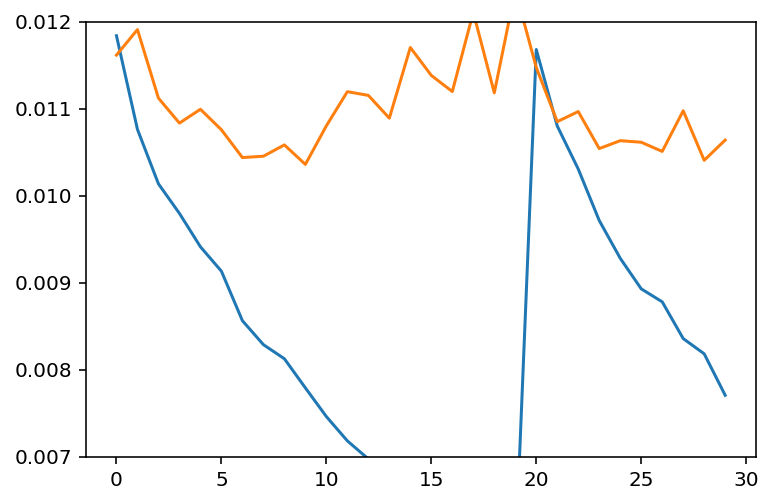

In [124]:
losses = []
val_losses = []

for out in outs:
    for h in out.history['loss']:
        losses.append(h)
    for h in out.history['val_loss']:
        val_losses.append(h)
        
plt.plot(losses)
plt.plot(val_losses)
# plt.yscale('log')
plt.ylim(0.007,0.012)

In [125]:
t = []
sim = []
back = []

for i in range(40):
    a, b = next(test_generator)
    t.append(b)
    back.append(a)
    sim.append(model_doc.predict(a))
    print(i, end=' ')
print(np.mean(sim), np.mean(t))

Creating generator from 1280 samples
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 0.0023926613 0.0028945630204443612


[]

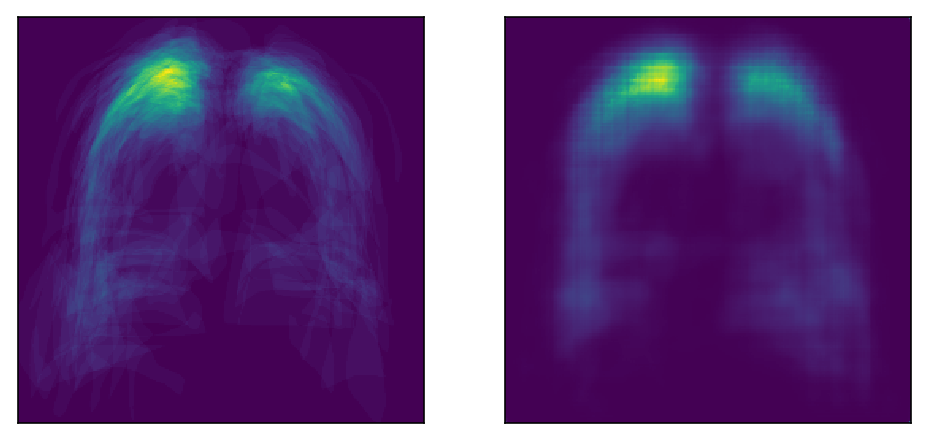

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(np.array(t).mean(0).mean(0).reshape(256, 256))
ax2.imshow(np.array(sim).mean(0).mean(0).reshape(256, 256))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

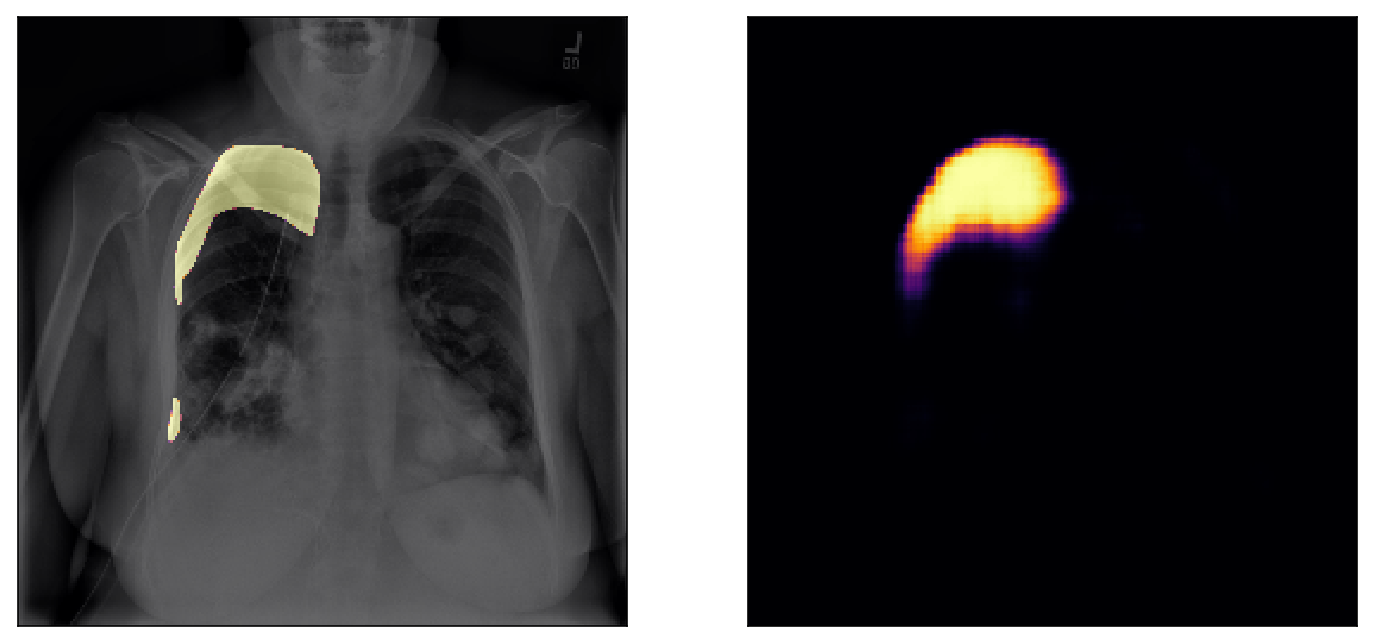

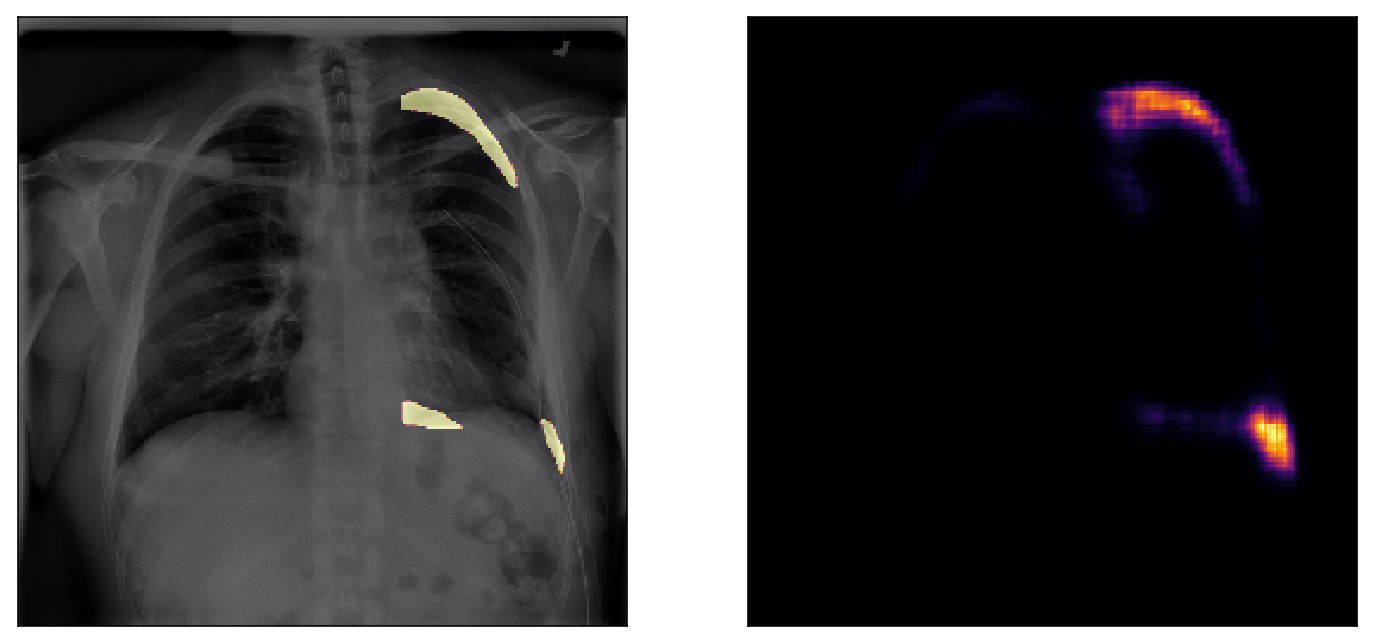

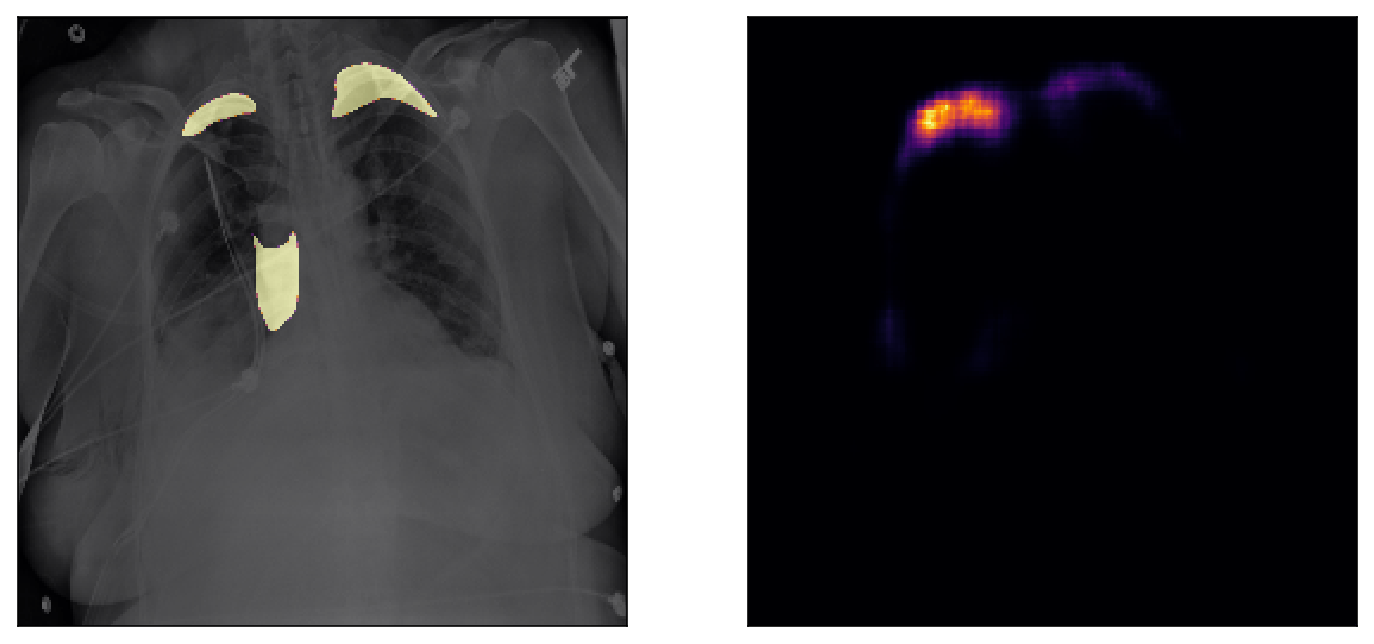

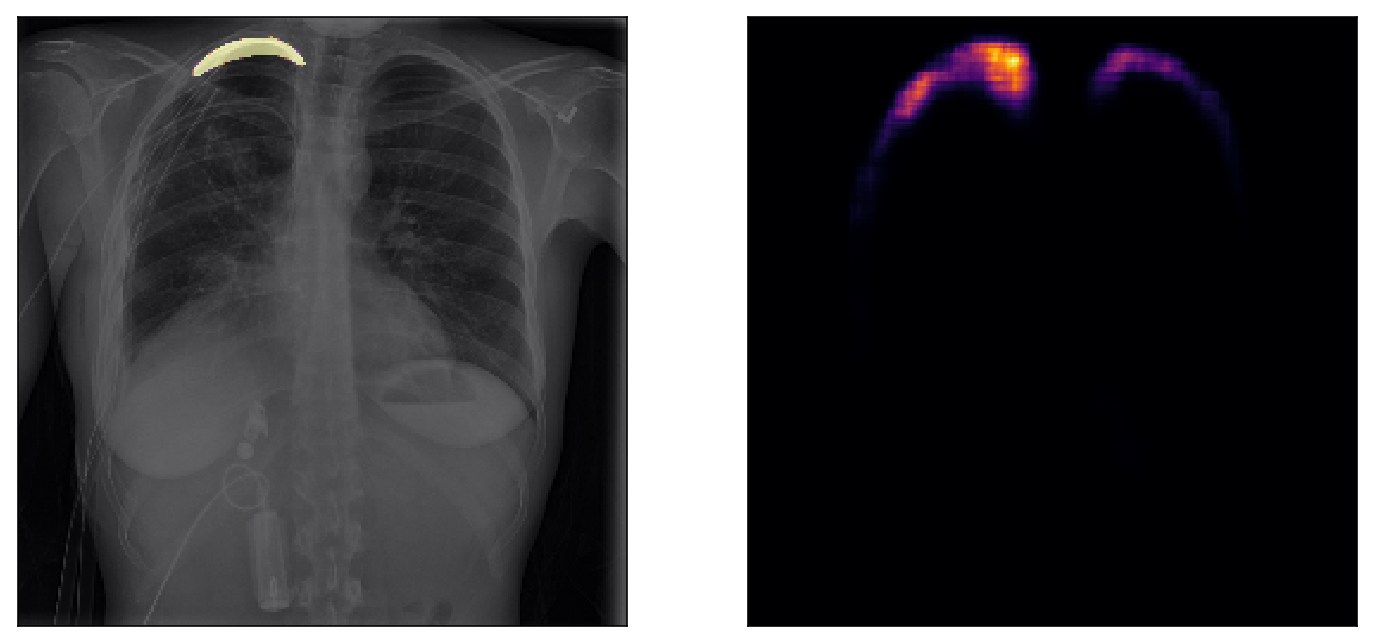

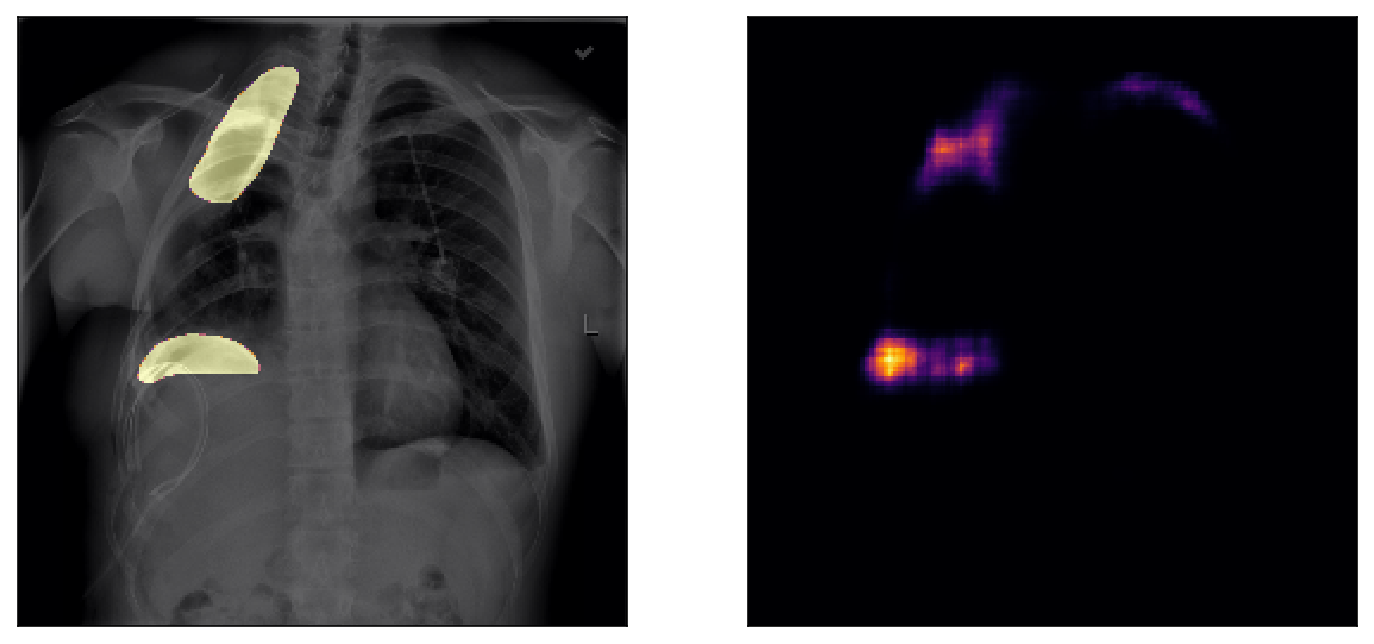

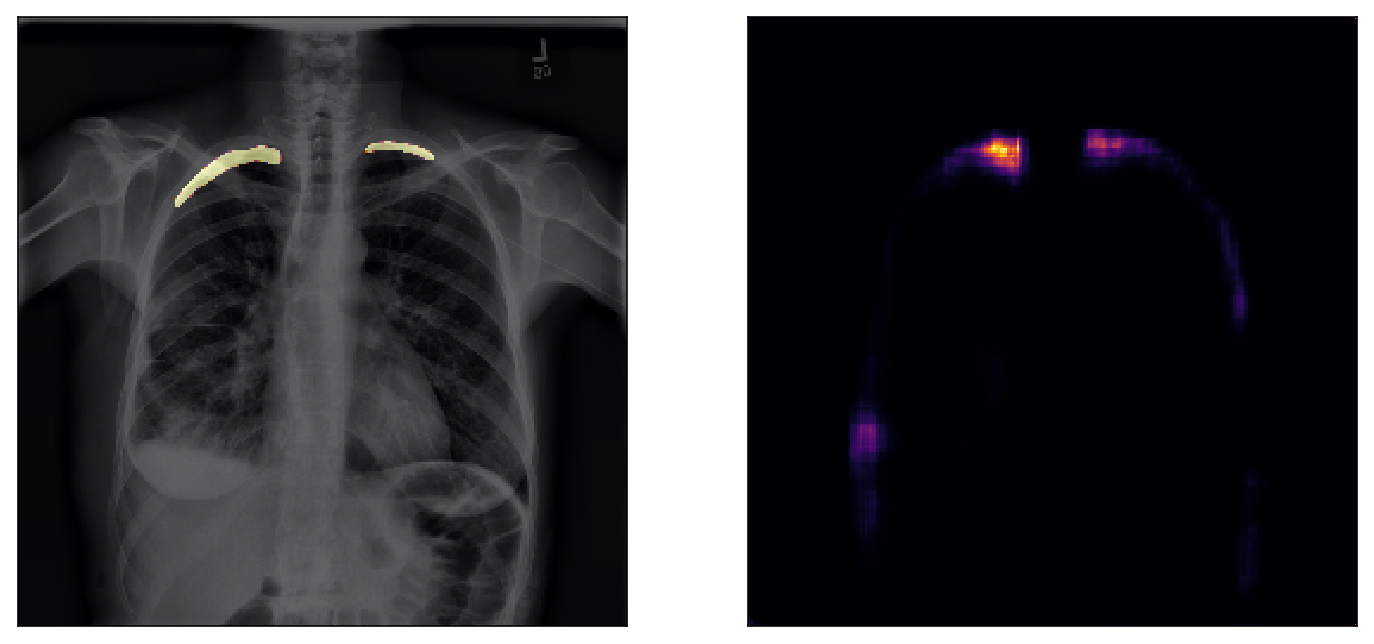

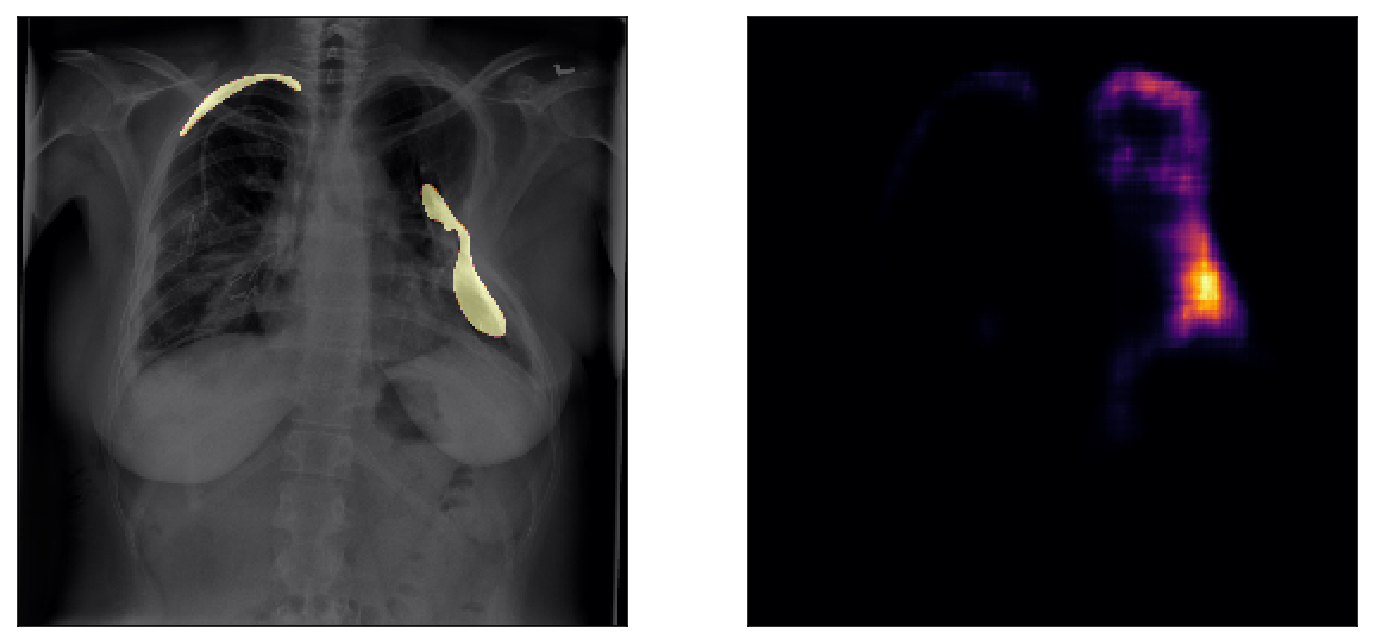

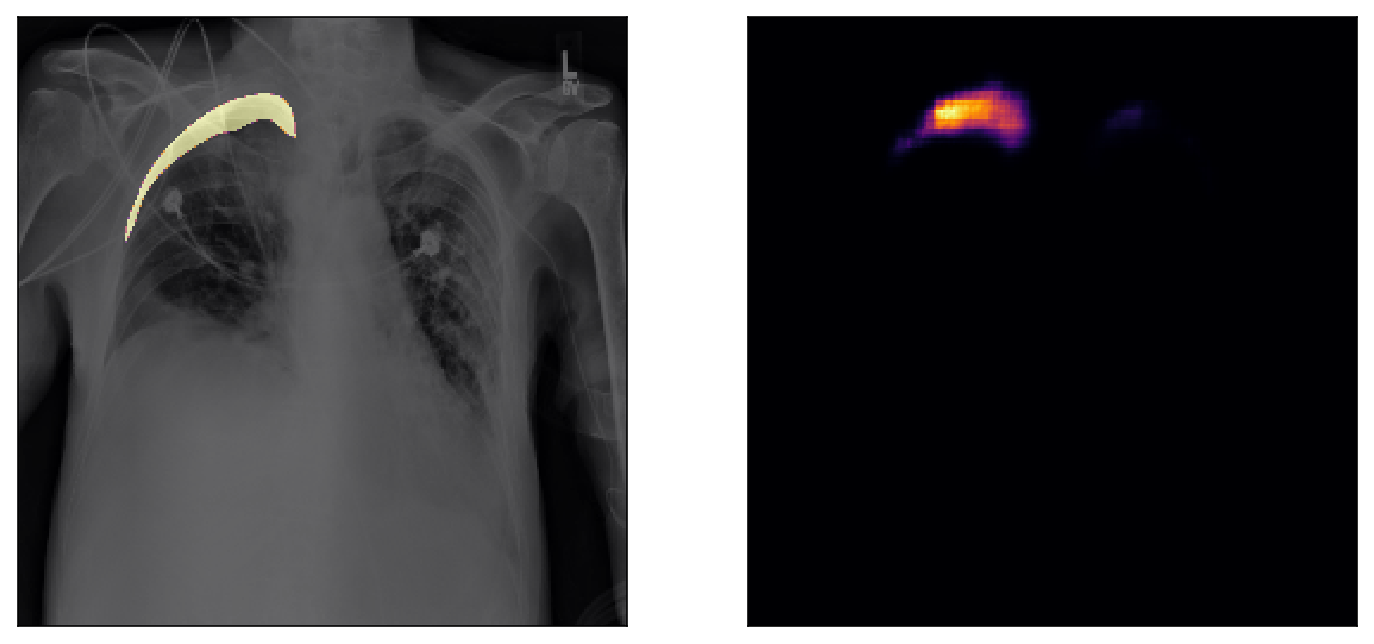

In [128]:
index = 0
for i in np.arange(0,32):
    if np.sum(t[index][i,...])>1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
        ax1.imshow(t[index][i,...].reshape(256, 256), cmap='inferno')
        ax1.imshow(back[index][i,...,0].reshape(256, 256), cmap='gray', alpha=0.4)
        ax2.imshow(sim[index][i,...].reshape(256, 256), cmap='inferno')

        ax1.set_xticks([])
        ax2.set_xticks([])    
        ax1.set_yticks([])    
        ax2.set_yticks([])    

In [0]:
3
out = doctor_model.fit_generator(train_generator,
                                 steps_per_epoch = 250,
                                 epochs=1,
                                 validation_data = test_generator,
                                 validation_steps = 80)

outs.append(out)

(0, 0.05)

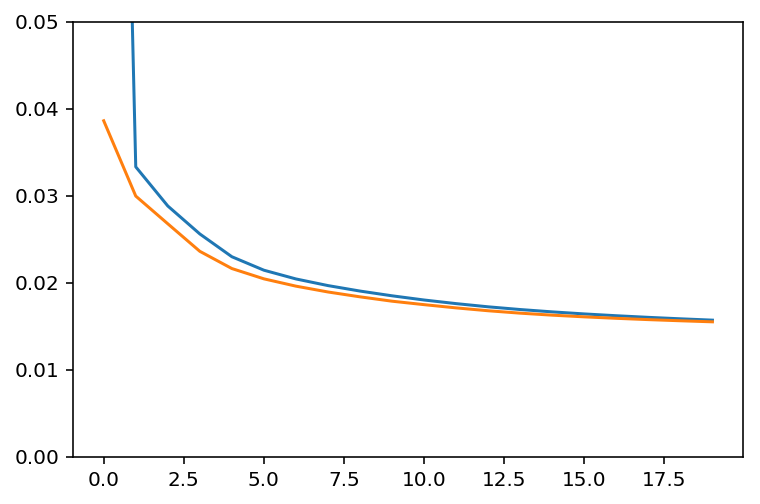

In [0]:


losses = []
val_losses = []

for out in outs:
    for h in out.history['loss']:
        losses.append(h)
    for h in out.history['val_loss']:
        val_losses.append(h)
        
plt.plot(losses)
plt.plot(val_losses)
plt.ylim(0,0.05)

In [0]:
a, b = next(train_generator)


In [0]:
img = a[0][:,:,:]
y = doctor_model.predict(a);
# img.shape

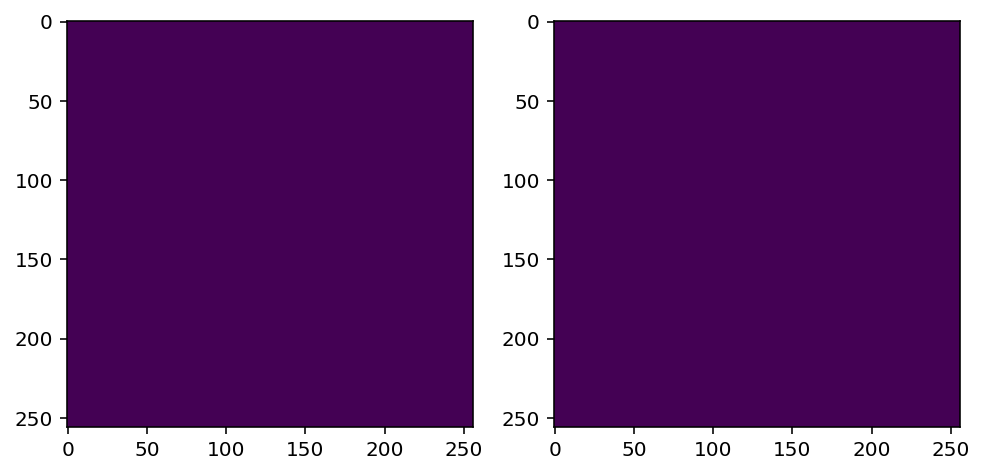

In [0]:
i=7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(y[i, :, :, 0])
ax2.imshow(b[i, :, :, 0])



In [0]:
%%time
conv_base.predict(a[0])
pass

ValueError: ignored

In [0]:
xray_path = f'{root_path}data/train/*'
mask_path = f'{root_path}data/masks/*'
xray_files = sorted(glob.glob(xray_path))[-19::-1]
mask_files = sorted(glob.glob(mask_path))[-19::-1]
len(mask_files)

10657

In [0]:
import tqdm
import time



def create_train_generator_test(train_files, target_files, batch_size):
    data_len = len(train_files)
    assert(len(target_files) == data_len), 'train-target data number mismatch'
    
    print(f'Creating generator from {data_len} samples')
    
    index = 0
    while True:
        data_train = np.zeros([batch_size, 256, 256, 1])
        data_target = np.zeros([batch_size, 256, 256, 1])

        for i in range(batch_size):
            t0 = time.time()
            img_train = img_to_array(load_img(train_files[index%data_len], color_mode='grayscale'))/255.
            data_train[i, ...] = img_train
          
            img_target = img_to_array(load_img(target_files[index%data_len], color_mode='grayscale'))/255.
            data_target[i, ...] = img_target
            
            if (time.time()-t0)>0.01:
                print(f'{index} - {time.time()-t0} - {train_files[index%data_len]}')
            
            index = index +1
            
        data_train = data_train * np.ones([batch_size, 256, 256, 3])
        data_target = data_target
        yield data_train, data_target
        
        

random.seed(16)
xray_path = f'{root_path}data/train/*'
mask_path = f'{root_path}data/masks/*'
xray_files = sorted(glob.glob(xray_path))[-19::-1]
mask_files = sorted(glob.glob(mask_path))[-19::-1]

c = list(zip(xray_files, mask_files))
random.shuffle(c)
xray_files, mask_files = zip(*c)


X_train_files = xray_files[:32*250]
y_train_files = mask_files[:32*250]

X_test_files = xray_files[32*250:32*(80+250)]
y_test_files = mask_files[32*250:32*(80+250)]
        
train_generator = create_train_generator_test(train_files=X_train_files, target_files=y_train_files, batch_size=32)


In [0]:
# %%time


# for i in tqdm.tqdm(range(333)):
#     a, b = next(train_generator)
#     pass

In [0]:
%%time 
a, b = next(train_generator)

StopIteration: ignored